# Lab 2 :

Syftet med den här laborationen är att använda verktygen du lärt dig i Python för att implementera en förenklad maskininlärningsalgoritm.

I den här laborationen finns (simulerad) data på Pichus och Pikachus längder och bredder. Du ska skapa en algoritm som baserat på den givna datan kunna avgöra om en ny data ska klassificeras som Pichu eller Pikachu.

In [3]:
def read_file(filepath):                    
    with open(filepath,"r") as f:
        content= f.read()
    return content                                  

def coordinates_in_file(filepath):                  
    raw_content=repr(read_file(filepath))           
    unwanted_strings=[" ","'","(",")"]              

    for unwanted_string in unwanted_strings :       
        raw_content=raw_content.replace(unwanted_string,"")

    clean_content=raw_content.replace(r"\n",",")    
    clean_list=clean_content.split(",")             

    list_of_coordinates=[float(item) for item in clean_list if item!="" and item[0].isdigit()]      
    
    X_axis=[list_of_coordinates[index] for index in range(len(list_of_coordinates)) if index%2==0]  
    Y_axis=[list_of_coordinates[index] for index in range(len(list_of_coordinates)) if index%2!=0]

    coordinates=[X_axis,Y_axis] 

    return coordinates 


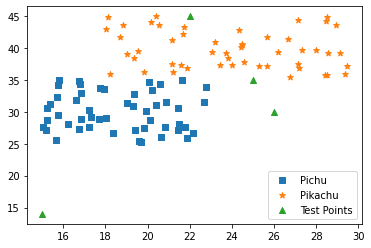

In [4]:
import matplotlib.pyplot as plt

path_test_points="files/test_points.txt"
path_pikachu="files/pikachu.txt"
path_pichu="files/pichu.txt"

coordinates_pichu = coordinates_in_file(path_pichu)
coordinates_pikachu = coordinates_in_file(path_pikachu)
coordinates_test_points = coordinates_in_file(path_test_points)

width_pichu=coordinates_pichu[0]
height_pichu=coordinates_pichu[1]

width_pikachu=coordinates_pikachu[0]
height_pikachu=coordinates_pikachu[1]

width_test_points=coordinates_test_points[0]
height_test_points=coordinates_test_points[1]

plt.figure()
plt.scatter(width_pichu,height_pichu,marker="s",label="Pichu")
plt.scatter(width_pikachu,height_pikachu,marker="*",label="Pikachu")
plt.scatter(width_test_points,height_test_points,marker="^",label="Test Points")
plt.legend(loc="lower right")

plt.show()

In [5]:
def distance(A,B):  
    return (((A[0]-B[0])**2+(A[1]-B[1])**2)**0.5) 


for i,j in zip(width_test_points,height_test_points): 
    all_distances=[]                                        
    X=[i,j]
    for k,l in zip(width_pichu,height_pichu):
        Y=[k,l]              
        all_distances.append([distance(X,Y),"Pichu"])
    for k,l in zip(width_pikachu,height_pikachu):
        Y=[k,l]
        all_distances.append([distance(X,Y),"Pikachu"])

    all_distances.sort()        
    print(f"Sample with (width,height) : ({i},{j}) is classified to be {all_distances[0][1]}") 

Sample with (width,height) : (25.0,35.0) is classified to be Pikachu
Sample with (width,height) : (15.0,14.0) is classified to be Pichu
Sample with (width,height) : (26.0,30.0) is classified to be Pichu
Sample with (width,height) : (22.0,45.0) is classified to be Pikachu


In [10]:
def ask_for_number(): 
    while True:
        try :
            number=input("Please enter the width of your pokemon : ")
            number=float(number)    
            if not number>0:    
                raise ValueError(f"Please enter {abs(number)} instead")  
            break   
        except ValueError as errorrr :
            print("Please enter a valid number")
    return number   

def finding_the_closest(point,checking):                
    all_distances=[]
    for i,j,k,l in zip(width_pichu,height_pichu,width_pikachu,height_pikachu):  
        if distance(point,[i,j])!=0:                                            
            all_distances.append([distance(point,[i,j]),"Pichu"])
        if distance(point,[i,j])!=0:
            all_distances.append([distance(point,[k,l]),"Pikachu"])

    all_distances.sort()                                                       
    closest_pokemons=[pokemon[1] for pokemon in all_distances[:checking]]                                                  
    
    if closest_pokemons.count("Pichu")>checking/2 :                            
        return("Pichu")
    else:
        return("Pikachu")


X=[ask_for_number() for i in range(2) ]                                         

print(f"The pokemon you entered is a :  {finding_the_closest(X,5)}")  

The pokemon you entered is a :  Pichu


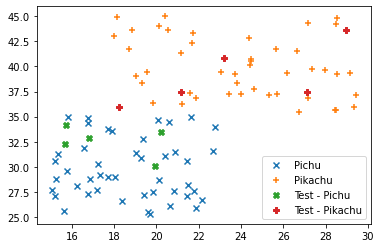

In [13]:
import random as rnd 


random_indexes=rnd.sample(range(0,49),5) 

width_random_points_pichu=[width_pichu[i] for i in range (50) if i in random_indexes]
height_random_points_pichu=[height_pichu[i] for i in range (50) if i in random_indexes]

width_random_points_pikachu=[width_pikachu[i] for i in range(50) if i in random_indexes]
height_random_points_pikachu=[height_pikachu[i] for i in range(50) if i in random_indexes]

width_training_points_pichu=[width_pichu[i] for i in range(50) if i not in random_indexes]
height_training_points_pichu=[height_pichu[i] for i in range(50) if i not in random_indexes]

width_training_points_pikachu=[width_pikachu[i] for i in range(50) if i not in random_indexes]
height_training_points_pikachu=[height_pikachu[i] for i in range(50) if i not in random_indexes]


plt.figure()
plt.scatter(width_training_points_pichu,height_training_points_pichu, marker="x",label="Pichu")
plt.scatter(width_training_points_pikachu,height_training_points_pikachu,marker="+",label="Pikachu")
plt.scatter(width_random_points_pichu,height_random_points_pichu,marker="X",label="Test - Pichu")
plt.scatter(width_random_points_pikachu,height_random_points_pikachu,marker="P",label="Test - Pikachu")

plt.legend(loc="lower right")
plt.show()

In [15]:

TP =sum([1 for i,j in zip(width_random_points_pikachu,height_random_points_pikachu) if finding_the_closest([i,j],5)=="Pikachu"])
FP =sum([1 for i,j in zip(width_random_points_pikachu,height_random_points_pikachu) if finding_the_closest([i,j],5)!="Pikachu"])
TN =sum([1 for i,j in zip(width_random_points_pichu,height_random_points_pichu) if finding_the_closest([i,j],5)=="Pichu"])
FN =sum([1 for i,j in zip(width_random_points_pichu,height_random_points_pichu) if finding_the_closest([i,j],5)!="Pichu"])

print(f"TP:{TP} | TN:{TN} | FP:{FP} | FN:{FN}")
print(f"Accuracy for these 5 random numbers = {int(100*(TP+TN)/(TP+FP+TN+FN))}%")

TP:4 | TN:5 | FP:1 | FN:0
Accuracy for these 5 random numbers = 90%


The highest accuracy is 100.0% and it could be reached by testing the 1 closest points


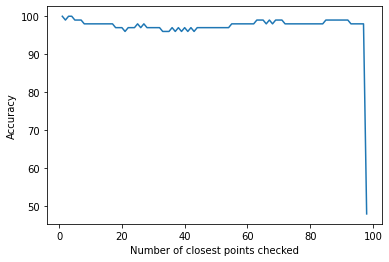

In [11]:
accuracy = 0
accuracies=[]
points_checked=[]

for number_points_to_check in range(1,99): 
    TP = 0 
    FP = 0 
    TN = 0 
    FN = 0 
    for i in range(50): 
        if finding_the_closest([width_pikachu[i],height_pikachu[i]],number_points_to_check)=="Pikachu":
            TP+=1
        else:
            FN+=1

        if finding_the_closest([width_pichu[i],height_pichu[i]],number_points_to_check)=="Pichu":
            TN+=1
        else:
            FP+=1  

    if accuracy<100*(TP+TN)/(TP+FP+TN+FN):
        accuracy=100*(TP+TN)/(TP+FP+TN+FN)
        lowest_number_point_to_check=number_points_to_check
    
    accuracies.append(100*(TP+TN)/(TP+FP+TN+FN))
    points_checked.append(number_points_to_check)
    
print(f"The highest accuracy is {accuracy}% and it could be reached by testing the {lowest_number_point_to_check} closest points")

plt.figure()
plt.plot(points_checked,accuracies)
plt.xlabel("Number of closest points checked")
plt.ylabel("Accuracy")

plt.show()